In [128]:
import pandas as pd
import numpy as np
import missingno as mn
import seaborn as sns
import matplotlib.pyplot as plt

# This script references a file that is too large for github. Sorry.

df = pd.read_csv(
    "data/2022_oes_st_occ_indus.csv",
    usecols=[
        "AREA",
        "AREA_TITLE",
        "NAICS",
        "NAICS_TITLE",
        "OCC_TITLE",
        "I_GROUP",
        "O_GROUP",
        "TOT_EMP",
        "A_PCT10",
        "A_PCT25",
        "A_MEDIAN",
        "A_PCT75",
        "A_PCT90",
        "PCT_TOTAL",
    ],
    na_values=["**", "*", "¹", "#", "~"],
    thousands=",",
)

In [129]:
df.O_GROUP.value_counts()

O_GROUP
detailed    653382
major       163109
total        19226
Name: count, dtype: int64

In [130]:
df = df[~df["AREA_TITLE"].isin(["Puerto Rico", "Guam", "Virgin Islands"])]

Notes:

¹ Relative Standard Error (RSE) is a measure of the reliability of a statistic; the smaller the relative standard error, the more precise the estimate",

\*  = indicates that a wage estimate is not available,

**  = indicates that an employment estimate is not available,

\# = indicates a wage that is equal to or greater than $115.00 per hour or $239,200 per year",

\~ = indicates a percent total less than 0.05% ,

In [131]:
# df[df.OCC_TITLE.eq(""Data Scientists"")]

state_indus_tot_empl = df[df.O_GROUP.eq("total") & df.I_GROUP.eq("sector")].pivot_table(
    index="AREA_TITLE", columns="NAICS_TITLE", values="TOT_EMP"
)
state_indus_tot_empl_melt = df.loc[
    df.O_GROUP.eq("total") & df.I_GROUP.eq("sector"),
    ["AREA_TITLE", "NAICS_TITLE", "TOT_EMP"],
]
display(state_indus_tot_empl_melt.head(2))
display(state_indus_tot_empl_melt.shape)
display(state_indus_tot_empl_melt.iloc[:, :2].drop_duplicates().shape)

,AREA_TITLE,NAICS_TITLE,TOT_EMP
16357,Alabama,"Agriculture, Forestry, Fishing and Hunting",5800.0
16358,Alaska,"Agriculture, Forestry, Fishing and Hunting",210.0


(1009, 3)

(1009, 2)

In [132]:
state_indus_median_salary = df[
    df.O_GROUP.eq("total") & df.I_GROUP.eq("sector")
].pivot_table(index="AREA_TITLE", columns="NAICS_TITLE", values="A_MEDIAN")
state_indus_salary_melt = df.loc[
    df.O_GROUP.eq("total") & df.I_GROUP.eq("sector"),
    ["AREA_TITLE", "NAICS_TITLE", "A_MEDIAN"],
]

In [133]:
sector_short_name = {
    "Accommodation and Food Services": "Food",
    "Administrative and Support and Waste Management and Remediation Services": "Waste",
    "Agriculture, Forestry, Fishing and Hunting": "Agriculture",
    "Arts, Entertainment, and Recreation": "Arts",
    "Construction": "Construction",
    "Educational Services": "Education",
    "Federal, State, and Local Government, excluding state and local schools and hospitals and the U.S. Postal Service (OES Designation)": "Government",
    "Finance and Insurance": "Finance",
    "Health Care and Social Assistance": "Health",
    "Information": "Information",
    "Management of Companies and Enterprises": "Management",
    "Manufacturing": "Manufacturing",
    "Mining, Quarrying, and Oil and Gas Extraction": "Mining",
    "Other Services (except Public Administration)": "Other",
    "Professional, Scientific, and Technical Services": "Professional",
    "Real Estate and Rental and Leasing": "Realty",
    "Retail Trade": "Retail",
    "Transportation and Warehousing": "Transportation",
    "Utilities": "Utilities",
    "Wholesale Trade": "Wholesale",
}
sector_long_name = {v: k for k, v in sector_short_name.items()}

In [134]:
state_indus_tot_empl.rename(
    columns={k: v + " Total Empl" for k, v in sector_short_name.items()}, inplace=True
)
state_indus_median_salary.rename(
    columns={k: v + " Mdn Salary" for k, v in sector_short_name.items()}, inplace=True
)

In [135]:
ds_tot_empl = df[
    df.O_GROUP.eq("detailed")
    & df.I_GROUP.eq("sector")
    & df.OCC_TITLE.eq("Data Scientists")
].pivot_table(index="AREA_TITLE", columns="NAICS_TITLE", values="TOT_EMP")
ds_tot_empl_melt = df.loc[
    df.O_GROUP.eq("detailed")
    & df.I_GROUP.eq("sector")
    & df.OCC_TITLE.str.contains("Data S"),
    ["AREA_TITLE", "NAICS_TITLE", "TOT_EMP"],
]
ds_mdn_salary = df[
    df.O_GROUP.eq("detail")
    & df.I_GROUP.eq("sector")
    & df.OCC_TITLE.eq("Data Scientists")
].pivot_table(index="AREA_TITLE", columns="NAICS_TITLE", values="A_MEDIAN")

ds_mdn_salary_melt = df.loc[
    df.O_GROUP.eq("detailed")
    & df.I_GROUP.eq("sector")
    & df.OCC_TITLE.str.contains("Data S"),
    ["AREA_TITLE", "NAICS_TITLE", "A_MEDIAN"],
]
ds_pct = df[
    df.O_GROUP.eq("detail")
    & df.I_GROUP.eq("sector")
    & df.OCC_TITLE.eq("Data Scientists")
].pivot_table(index="AREA_TITLE", columns="NAICS_TITLE", values="PCT_TOTAL")

ds_pct_melt = df.loc[
    df.O_GROUP.eq("detailed")
    & df.I_GROUP.eq("sector")
    & df.OCC_TITLE.str.contains("Data S"),
    ["AREA_TITLE", "NAICS_TITLE", "PCT_TOTAL"],
]

In [136]:
df[df.OCC_TITLE.str.contains("Data S")]["OCC_TITLE"].value_counts()

OCC_TITLE
Data Scientists    1565
Name: count, dtype: int64

In [137]:
ds_tot_empl.rename(
    columns={k: "DS " + v + " Tot Empl" for k, v in sector_short_name.items()},
    inplace=True,
)
ds_mdn_salary.rename(
    columns={k: "DS " + v + " Mdn Salary" for k, v in sector_short_name.items()},
    inplace=True,
)
ds_pct.rename(
    columns={k: "DS " + v + " Pct" for k, v in sector_short_name.items()},
    inplace=True,
)

In [138]:
vars = (
    state_indus_tot_empl_melt,
    state_indus_salary_melt,
    ds_tot_empl_melt,
    ds_mdn_salary_melt,
    ds_pct_melt,
)

for var in vars:
    display(var.head(2))
    display(var.shape)
    display(var.iloc[:, :2].drop_duplicates().shape)

,AREA_TITLE,NAICS_TITLE,TOT_EMP
16357,Alabama,"Agriculture, Forestry, Fishing and Hunting",5800.0
16358,Alaska,"Agriculture, Forestry, Fishing and Hunting",210.0


(1009, 3)

(1009, 2)

,AREA_TITLE,NAICS_TITLE,A_MEDIAN
16357,Alabama,"Agriculture, Forestry, Fishing and Hunting",41080.0
16358,Alaska,"Agriculture, Forestry, Fishing and Hunting",57260.0


(1009, 3)

(1009, 2)

,AREA_TITLE,NAICS_TITLE,TOT_EMP
226322,Alabama,Manufacturing,30.0
226323,Alabama,Information,60.0


(369, 3)

(369, 2)

,AREA_TITLE,NAICS_TITLE,A_MEDIAN
226322,Alabama,Manufacturing,76480.0
226323,Alabama,Information,59750.0


(369, 3)

(369, 2)

,AREA_TITLE,NAICS_TITLE,PCT_TOTAL
226322,Alabama,Manufacturing,0.01
226323,Alabama,Information,0.25


(369, 3)

(369, 2)

In [139]:
state_totals = pd.read_csv(
    "data/bls_all_data_M_2022_states.csv",
    na_values=["**", "*", "¹", "#", "~"],
    thousands=",",
    usecols=["AREA_TITLE", "TOT_EMP", "A_MEDIAN"],
)

In [140]:
from functools import reduce

final = reduce(
    lambda x, y: x.merge(
        y,
        how="left",
        left_on=["AREA_TITLE", "NAICS_TITLE"],
        right_on=["AREA_TITLE", "NAICS_TITLE"],
    ),
    vars,
)
display(final)
display(state_totals)
final = final.merge(
    state_totals, how="left", left_on="AREA_TITLE", right_on="AREA_TITLE"
)

display(final)

,AREA_TITLE,NAICS_TITLE,TOT_EMP_x,A_MEDIAN_x,TOT_EMP_y,A_MEDIAN_y,PCT_TOTAL
0,Alabama,"Agriculture, Forestry, Fishing and Hunting",5800.0,41080.0,NaN,NaN,NaN
1,Alaska,"Agriculture, Forestry, Fishing and Hunting",210.0,57260.0,NaN,NaN,NaN
2,Arizona,"Agriculture, Forestry, Fishing and Hunting",9840.0,30080.0,NaN,NaN,NaN
3,Arkansas,"Agriculture, Forestry, Fishing and Hunting",4120.0,37920.0,NaN,NaN,NaN
4,California,"Agriculture, Forestry, Fishing and Hunting",239210.0,33540.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1004,Virginia,"Federal, State, and Local Government, excludin...",357640.0,65750.0,50.0,84680.0,0.01
1005,Washington,"Federal, State, and Local Government, excludin...",258360.0,77760.0,NaN,NaN,NaN
1006,West Virginia,"Federal, State, and Local Government, excludin...",76640.0,43590.0,40.0,64690.0,0.05
1007,Wisconsin,"Federal, State, and Local Government, excludin...",160490.0,54890.0,NaN,NaN,NaN


,AREA_TITLE,TOT_EMP,A_MEDIAN
0,Alabama,NaN,85870.0
1,Alaska,150.0,100040.0
2,Arizona,2860.0,102770.0
3,California,29420.0,126810.0
4,Colorado,3540.0,103200.0
5,Connecticut,950.0,105700.0
6,Delaware,480.0,132300.0
7,District of Columbia,3200.0,97660.0
8,Florida,8190.0,100520.0
9,Georgia,5650.0,100400.0


,AREA_TITLE,NAICS_TITLE,TOT_EMP_x,A_MEDIAN_x,TOT_EMP_y,A_MEDIAN_y,PCT_TOTAL,TOT_EMP,A_MEDIAN
0,Alabama,"Agriculture, Forestry, Fishing and Hunting",5800.0,41080.0,NaN,NaN,NaN,NaN,85870.0
1,Alaska,"Agriculture, Forestry, Fishing and Hunting",210.0,57260.0,NaN,NaN,NaN,150.0,100040.0
2,Arizona,"Agriculture, Forestry, Fishing and Hunting",9840.0,30080.0,NaN,NaN,NaN,2860.0,102770.0
3,Arkansas,"Agriculture, Forestry, Fishing and Hunting",4120.0,37920.0,NaN,NaN,NaN,NaN,NaN
4,California,"Agriculture, Forestry, Fishing and Hunting",239210.0,33540.0,NaN,NaN,NaN,29420.0,126810.0
...,...,...,...,...,...,...,...,...,...
1004,Virginia,"Federal, State, and Local Government, excludin...",357640.0,65750.0,50.0,84680.0,0.01,4500.0,132400.0
1005,Washington,"Federal, State, and Local Government, excludin...",258360.0,77760.0,NaN,NaN,NaN,4160.0,135850.0
1006,West Virginia,"Federal, State, and Local Government, excludin...",76640.0,43590.0,40.0,64690.0,0.05,70.0,67010.0
1007,Wisconsin,"Federal, State, and Local Government, excludin...",160490.0,54890.0,NaN,NaN,NaN,2740.0,95410.0


In [141]:
final.columns = [
    "state",
    "sector",
    "state_sector_tot_headcount",
    "state_sector_salary",
    "ds_state_sector_headcount",
    "ds_state_sector_salary",
    "ds_state_sector_pct",
    "ds_state_tot_headcount",
    "ds_state_mdn_salary",
]

In [142]:
final.to_csv("data/imputation/state_sector_data.csv", index=False)

In [143]:
pd.read_csv("data/imputation/state_sector_data.csv")

,state,sector,state_sector_tot_headcount,state_sector_salary,ds_state_sector_headcount,ds_state_sector_salary,ds_state_sector_pct,ds_state_tot_headcount,ds_state_mdn_salary
0,Alabama,"Agriculture, Forestry, Fishing and Hunting",5800.0,41080.0,NaN,NaN,NaN,NaN,85870.0
1,Alaska,"Agriculture, Forestry, Fishing and Hunting",210.0,57260.0,NaN,NaN,NaN,150.0,100040.0
2,Arizona,"Agriculture, Forestry, Fishing and Hunting",9840.0,30080.0,NaN,NaN,NaN,2860.0,102770.0
3,Arkansas,"Agriculture, Forestry, Fishing and Hunting",4120.0,37920.0,NaN,NaN,NaN,NaN,NaN
4,California,"Agriculture, Forestry, Fishing and Hunting",239210.0,33540.0,NaN,NaN,NaN,29420.0,126810.0
...,...,...,...,...,...,...,...,...,...
1004,Virginia,"Federal, State, and Local Government, excludin...",357640.0,65750.0,50.0,84680.0,0.01,4500.0,132400.0
1005,Washington,"Federal, State, and Local Government, excludin...",258360.0,77760.0,NaN,NaN,NaN,4160.0,135850.0
1006,West Virginia,"Federal, State, and Local Government, excludin...",76640.0,43590.0,40.0,64690.0,0.05,70.0,67010.0
1007,Wisconsin,"Federal, State, and Local Government, excludin...",160490.0,54890.0,NaN,NaN,NaN,2740.0,95410.0


In [144]:
(
    ~final[
        ["ds_state_sector_headcount", "ds_state_sector_salary", "ds_state_sector_pct"]
    ].isna()
).sum(axis=1).value_counts()

0    641
3    344
1     17
2      7
Name: count, dtype: int64

Text(0.5, 1.0, 'Non-missing entries by variable')

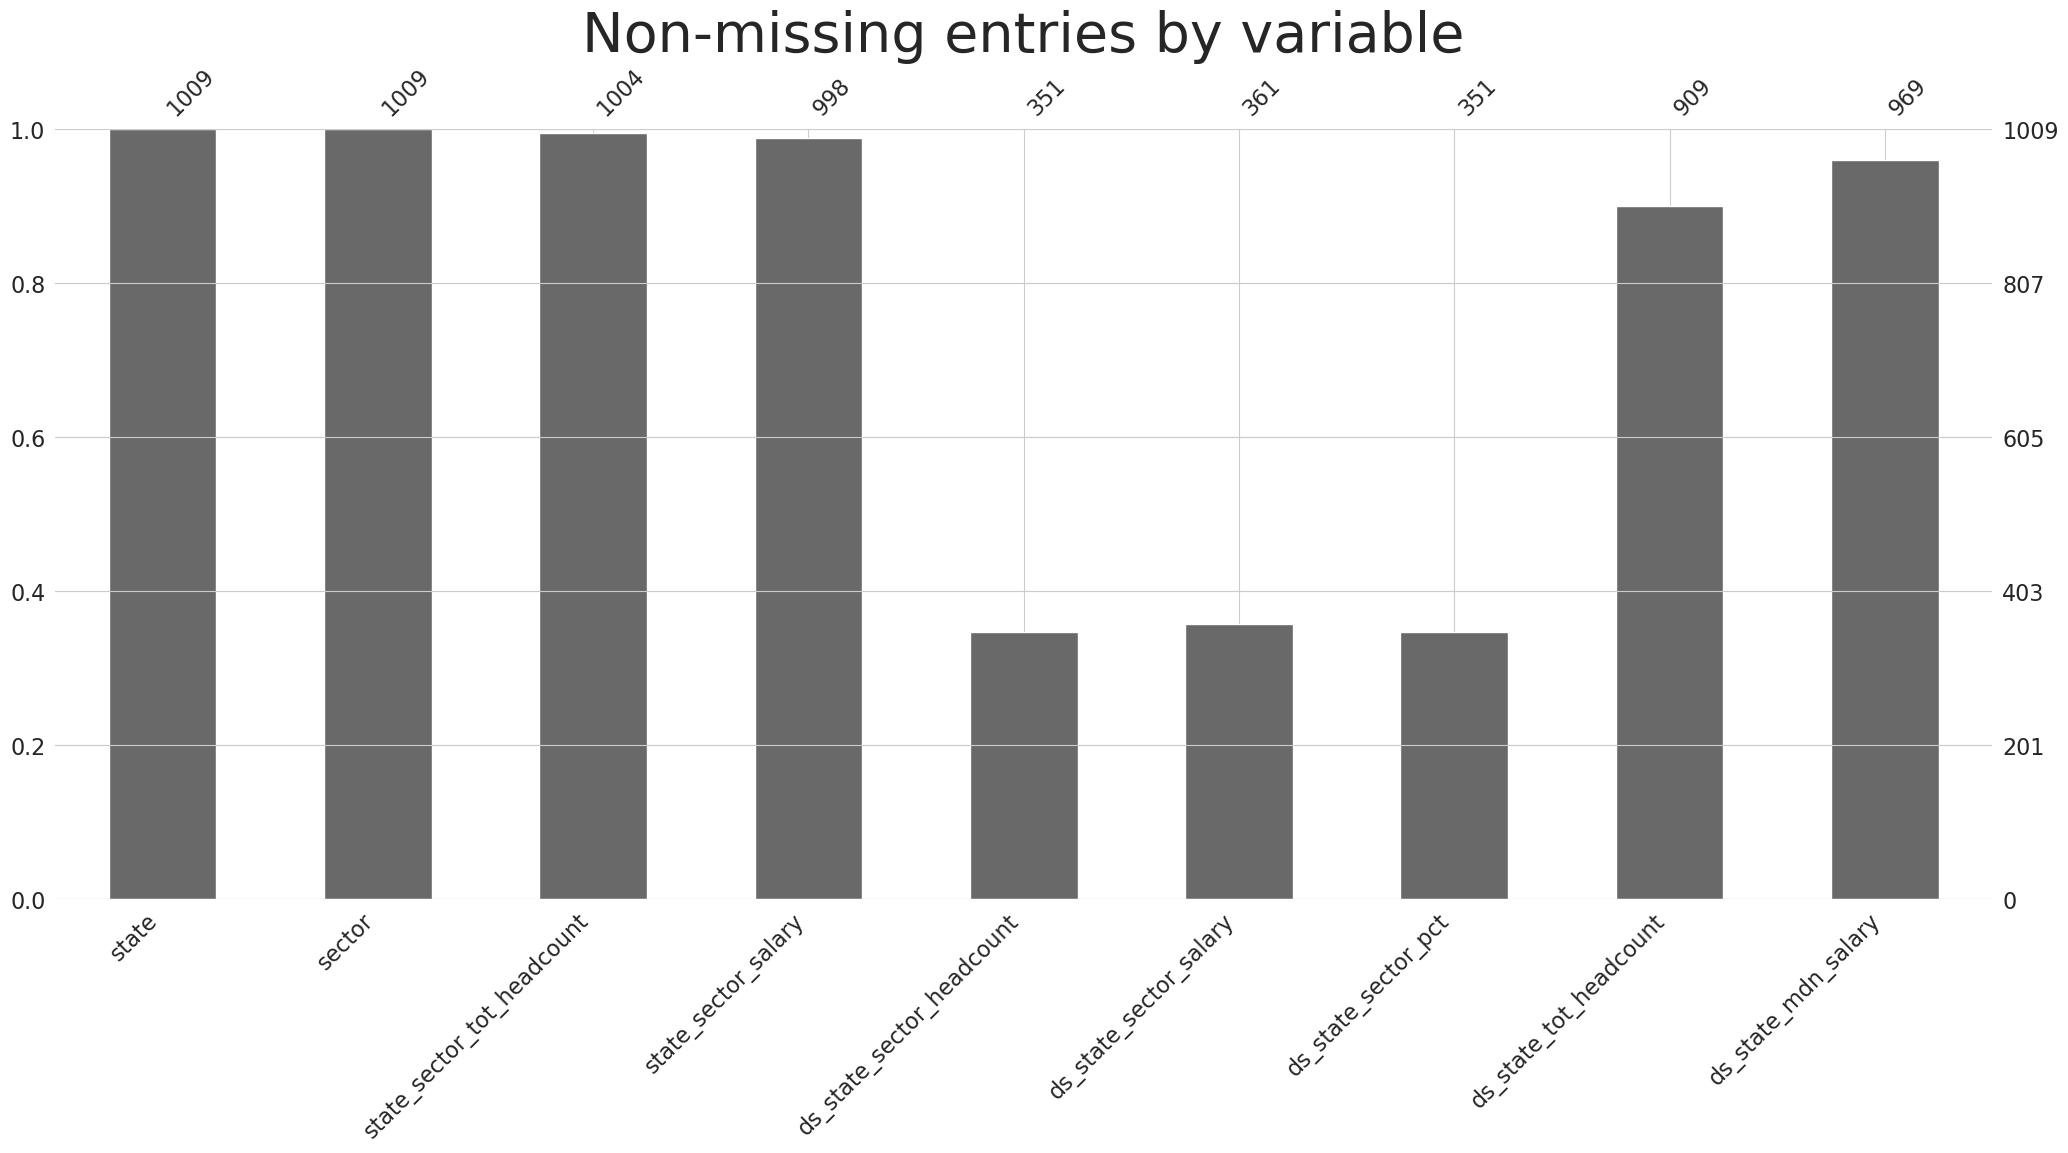

In [145]:
sns.set_style("whitegrid")
plt.subplots(
    figsize=(20, 20),
)
mn.bar(final)
plt.title("Non-missing entries by variable", fontsize=40)

In [146]:
mdl = smf.ols(
    "ds_state_mdn_salary~state",
    data=subset[["ds_state_mdn_salary", "state"]].drop_duplicates(),
).fit()
mdl.summary()

/home/red/anaconda3/envs/cda_project/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/red/anaconda3/envs/cda_project/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/red/anaconda3/envs/cda_project/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ds_state_mdn_salary   R-squared:                       1.000
Model:                             OLS   Adj. R-squared:                    nan
Method:                  Least Squares   F-statistic:                       nan
Date:                 Sun, 21 Apr 2024   Prob (F-statistic):                nan
Time:                         10:39:56   Log-Likelihood:                 1063.7
No. Observations:                   49   AIC:                            -2029.
Df Residuals:                        0   BIC:                            -1937.
Df Model:                           48                                         
Covariance Type:             nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      8.587e+04        inf          0        nan         nan         nan
state[T.Alaska]                1.417e+04        inf          0        nan         nan         nan
state[T.Arizona]                1.69e+04        inf          0        nan         nan         nan
state[T.California]            4.094e+04        inf          0        nan         nan         nan
state[T.Colorado]              1.733e+04        inf          0        nan         nan         nan
state[T.Connecticut]           1.983e+04        inf          0        nan         nan         nan
state[T.Delaware]              4.643e+04        inf          0        nan         nan         nan
state[T.District of Columbia]  1.179e+04        inf          0        nan         nan         nan
state[T.Florida]               1.465e+04        inf          0        nan         nan         nan
state[T.Georgia]               1.453e+04        inf          0        nan         nan         nan
state[T.Hawaii]                2.646e+04        inf          0        nan         nan         nan
state[T.Idaho]                 1.062e+04        inf          0        nan         nan         nan
state[T.Illinois]              1.786e+04        inf          0        nan         nan         nan
state[T.Indiana]              -9900.0000        inf         -0        nan         nan         nan
state[T.Iowa]                  8990.0000        inf          0        nan         nan         nan
state[T.Kansas]                2990.0000        inf          0        nan         nan         nan
state[T.Kentucky]             -3880.0000        inf         -0        nan         nan         nan
state[T.Louisiana]            -2.046e+04        inf         -0        nan         nan         nan
state[T.Maine]                 9830.0000        inf          0        nan         nan         nan
state[T.Maryland]              3.186e+04        inf          0        nan         nan         nan
state[T.Massachusetts]          2.02e+04        inf          0        nan         nan         nan
state[T.Michigan]              -400.0000        inf         -0        nan         nan         nan
state[T.Minnesota]             2.105e+04        inf          0        nan         nan         nan
state[T.Mississippi]          -2.892e+04        inf         -0        nan         nan         nan
state[T.Missouri]             -7090.0000        inf         -0        nan         nan         nan
state[T.Montana]              -1.067e+04        inf         -0        nan         nan         nan
state[T.Nebraska]             -1380.0000        inf         -0        nan         nan         nan
state[T.Nevada]               -3760.0000        inf         -0        nan         nan         nan
state[T.New Hampshire]        -825

In [147]:
state_level_dist = pd.read_csv(
    "data/bls_all_data_M_2022_states.csv",
    na_values=["**", "*", "¹", "#", "~"],
    thousands=",",
    usecols=[
        "AREA_TITLE",
        "TOT_EMP",
        "A_MEAN",
        "MEAN_PRSE",
         "A_PCT10",
        "A_PCT25",
        "A_MEDIAN",
        "A_PCT75",
        "A_PCT90",
    ],
)

In [148]:
pd.json_normalize(
    {
    0: {
        0.05: {
            "state_sector_tot_headcount": 4266113829.9758425,
            "state_sector_salary": 8311368.995960479,
            "ds_state_sector_headcount": 29624.5672902232,
            "ds_state_sector_salary": 20936572.243378066,
            "ds_state_sector_pct": 0.0013526285703851927,
            "ds_state_tot_headcount": 817558.4406081138,
            "ds_state_mdn_salary": 7355172.1721366225,
        },
        0.1: {
            "state_sector_tot_headcount": 8650999706.25624,
            "state_sector_salary": 7896880.266815004,
            "ds_state_sector_headcount": 164633.7053566593,
            "ds_state_sector_salary": 3513291.948366623,
            "ds_state_sector_pct": 0.0033627898806512756,
            "ds_state_tot_headcount": 1101215.1151375906,
            "ds_state_mdn_salary": 14613434.701637235,
        },
        0.15: {
            "state_sector_tot_headcount": 3200528389.079782,
            "state_sector_salary": 4884674.116200855,
            "ds_state_sector_headcount": 14449.173791997213,
            "ds_state_sector_salary": 50485647.71808436,
            "ds_state_sector_pct": 0.0024050767693472204,
            "ds_state_tot_headcount": 1551922.8505659525,
            "ds_state_mdn_salary": 24702864.375147674,
        },
        0.2: {
            "state_sector_tot_headcount": 3024796704.253268,
            "state_sector_salary": 22183120.589222476,
            "ds_state_sector_headcount": 58929.52123237061,
            "ds_state_sector_salary": 15264666.205481486,
            "ds_state_sector_pct": 0.14176315219642466,
            "ds_state_tot_headcount": 590516.5855380506,
            "ds_state_mdn_salary": 1423074.9069588857,
        },
    },
    1: {
        0.05: {
            "state_sector_tot_headcount": 8023761410.836203,
            "state_sector_salary": 11735813.289030474,
            "ds_state_sector_headcount": 13061.154410198427,
            "ds_state_sector_salary": 60839043.59600594,
            "ds_state_sector_pct": 0.00459130470226303,
            "ds_state_tot_headcount": 1393105.1259951422,
            "ds_state_mdn_salary": 12725322.175964523,
        },
        0.1: {
            "state_sector_tot_headcount": 2224891347.3796573,
            "state_sector_salary": 56365683.72180983,
            "ds_state_sector_headcount": 42077.233852169134,
            "ds_state_sector_salary": 23348189.42509194,
            "ds_state_sector_pct": 0.003199532085058243,
            "ds_state_tot_headcount": 1225186.3954572598,
            "ds_state_mdn_salary": 10300192.544423442,
        },
        0.15: {
            "state_sector_tot_headcount": 6556691890.553854,
            "state_sector_salary": 11649887.547683679,
            "ds_state_sector_headcount": 40570.8235668431,
            "ds_state_sector_salary": 29032604.46770826,
            "ds_state_sector_pct": 0.004321614786145008,
            "ds_state_tot_headcount": 53776.759938620875,
            "ds_state_mdn_salary": 972807.2238324969,
        },
        0.2: {
            "state_sector_tot_headcount": 2461211392.5863767,
            "state_sector_salary": 8659698.258333817,
            "ds_state_sector_headcount": 17288.71821934612,
            "ds_state_sector_salary": 44221566.38099298,
            "ds_state_sector_pct": 0.0043738272716506,
            "ds_state_tot_headcount": 400725.6854028831,
            "ds_state_mdn_salary": 17882874.61677304,
        },
    },
    2: {
        0.05: {
            "state_sector_tot_headcount": 3028004963.5652356,
            "state_sector_salary": 33866278.415330395,
            "ds_state_sector_headcount": 25915.130332946228,
            "ds_state_sector_salary": 33564367.183786556,
            "ds_state_sector_pct": 0.0027803589632069466,
            "ds_state_tot_headcount": 231688.39842902942,
            "ds_state_mdn_salary": 25830915.971336734,
        },
        0.1: {
            "state_sector_tot_headcount": 7101485430.7087755,
            "state_sector_salary": 1278717.6192276538,
            "ds_state_sector_headcount": 21639.453234430646,
            "ds_state_sector_salary": 42986026.788944185,
            "ds_state_sector_pct": 0.004493668800521849,
            "ds_state_tot_headcount": 42887.52480158733,
            "ds_state_mdn_salary": 18338226.24848244,
        },
        0.15: {
            "state_sector_tot_headcount": 4449141775.860848,
            "state_sector_salary": 27891836.611386046,
            "ds_state_sector_headcount": 32377.124218790857,
            "ds_state_sector_salary": 27544790.580358326,
            "ds_state_sector_pct": 0.0008443624062433662,
            "ds_state_tot_headcount": 513248.52918054437,
            "ds_state_mdn_salary": 18058970.036712456,
        },
        0.2: {
            "state_sector_tot_headcount": 14074307722.765127,
            "state_sector_salary": 22749886.36913338,
            "ds_state_sector_headcount": 35799.71716384081,
            "ds_state_sector_salary": 28155616.764493704,
            "ds_state_sector_pct": 0.004138926870037484,
            "ds_state_tot_headcount": 448269.81628373335,
            "ds_state_mdn_salary": 14236981.01587302,
        },
    },
    3: {
        0.05: {
            "state_sector_tot_headcount": 1945482987.1921465,
            "state_sector_salary": 23805325.796603743,
            "ds_state_sector_headcount": 621965.4914014385,
            "ds_state_sector_salary": 28830774.02306893,
            "ds_state_sector_pct": 0.02000246005182789,
            "ds_state_tot_headcount": 955546.5741985808,
            "ds_state_mdn_salary": 6645297.331268145,
        },
        0.1: {
            "state_sector_tot_headcount": 3833606607.327383,
            "state_sector_salary": 7007335.154247797,
            "ds_state_sector_headcount": 622957.561718794,
            "ds_state_sector_salary": 42061443.67680782,
            "ds_state_sector_pct": 0.0056065935014785375,
            "ds_state_tot_headcount": 920468.8459276998,
            "ds_state_mdn_salary": 2186196.622090136,
        },
        0.15: {
            "state_sector_tot_headcount": 2765473294.321647,
            "state_sector_salary": 14456884.662276484,
            "ds_state_sector_headcount": 11200.676321876479,
            "ds_state_sector_salary": 35835681.74119006,
            "ds_state_sector_pct": 0.0023868057734368424,
            "ds_state_tot_headcount": 436627.3389064782,
            "ds_state_mdn_salary": 7260870.910268871,
        },
        0.2: {
            "state_sector_tot_headcount": 5073807402.388479,
            "state_sector_salary": 11162884.922203269,
            "ds_state_sector_headcount": 57050.10346294802,
            "ds_state_sector_salary": 67104741.527966134,
            "ds_state_sector_pct": 0.0026604387526424976,
            "ds_state_tot_headcount": 832719.0303735797,
            "ds_state_mdn_salary": 4117401.7641956997,
        },
    },
    4: {
        0.05: {
            "state_sector_tot_headcount": 2724988475.934114,
            "state_sector_salary": 17022377.98899514,
            "ds_state_sector_headcount": 3813.723130731251,
            "ds_state_sector_salary": 82464868.12005922,
            "ds_state_sector_pct": 0.0024639543383883763,
            "ds_state_tot_headcount": 1322585.3873736009,
            "ds_state_mdn_salary": 14670314.949010385,
        },
        0.1: {
            "state_sector_tot_headcount": 4732715124.270504,
            "state_sector_salary": 4358040.970101573,
            "ds_state_sector_headcount": 11049.30551335991,
            "ds_state_sector_salary": 53545061.02983927,
            "ds_state_sector_pct": 0.00781273503399237,
            "ds_state_tot_headcount": 247389.87301587313,
            "ds_state_mdn_salary": 9987364.337073192,
        },
        0.15: {
            "state_sector_tot_headcount": 1332256823.9423523,
            "state_sector_salary": 22638903.958827466,
            "ds_state_sector_headcount": 18725.73155357221,
            "ds_state_sector_salary": 37852952.57187342,
            "ds_state_sector_pct": 0.0028085530245632747,
            "ds_state_tot_headcount": 789412.1718510854,
            "ds_state_mdn_salary": 15140460.020416925,
        },
        0.2: {
            "state_sector_tot_headcount": 4009927220.7524624,
            "state_sector_salary": 5084777.486840671,
            "ds_state_sector_headcount": 13299.472398565194,
            "ds_state_sector_salary": 57860332.93360544,
            "ds_state_sector_pct": 0.011655531689142443,
            "ds_state_tot_headcount": 1719010.4348699318,
            "ds_state_mdn_salary": 8927394.499251064,
        },
    },
})

,0.0.05.state_sector_tot_headcount,0.0.05.state_sector_salary,0.0.05.ds_state_sector_headcount,0.0.05.ds_state_sector_salary,0.0.05.ds_state_sector_pct,0.0.05.ds_state_tot_headcount,0.0.05.ds_state_mdn_salary,0.0.1.state_sector_tot_headcount,0.0.1.state_sector_salary,0.0.1.ds_state_sector_headcount,...,4.0.15.ds_state_sector_pct,4.0.15.ds_state_tot_headcount,4.0.15.ds_state_mdn_salary,4.0.2.state_sector_tot_headcount,4.0.2.state_sector_salary,4.0.2.ds_state_sector_headcount,4.0.2.ds_state_sector_salary,4.0.2.ds_state_sector_pct,4.0.2.ds_state_tot_headcount,4.0.2.ds_state_mdn_salary
0,4.266114e+09,8.311369e+06,29624.56729,2.093657e+07,0.001353,817558.440608,7.355172e+06,8.651000e+09,7.896880e+06,164633.705357,...,0.002809,789412.171851,1.514046e+07,4.009927e+09,5.084777e+06,13299.472399,5.786033e+07,0.011656,1.719010e+06,8.927394e+06


In [149]:
pd.read_csv(
    "data/bls_all_data_M_2022_states.csv",
    na_values=["**", "*", "¹", "#", "~"],
    thousands=",",).columns

Index(['AREA', 'AREA_TITLE', 'AREA_TYPE', 'PRIM_STATE', 'NAICS', 'NAICS_TITLE',
       'I_GROUP', 'OWN_CODE', 'OCC_CODE', 'OCC_TITLE', 'O_GROUP', 'TOT_EMP',
       'EMP_PRSE', 'JOBS_1000', 'LOC_QUOTIENT', 'PCT_TOTAL', 'PCT_RPT',
       'H_MEAN', 'A_MEAN', 'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN',
       'H_PCT75', 'H_PCT90', 'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75',
       'A_PCT90', 'ANNUAL', 'HOURLY'],
      dtype='object')